In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

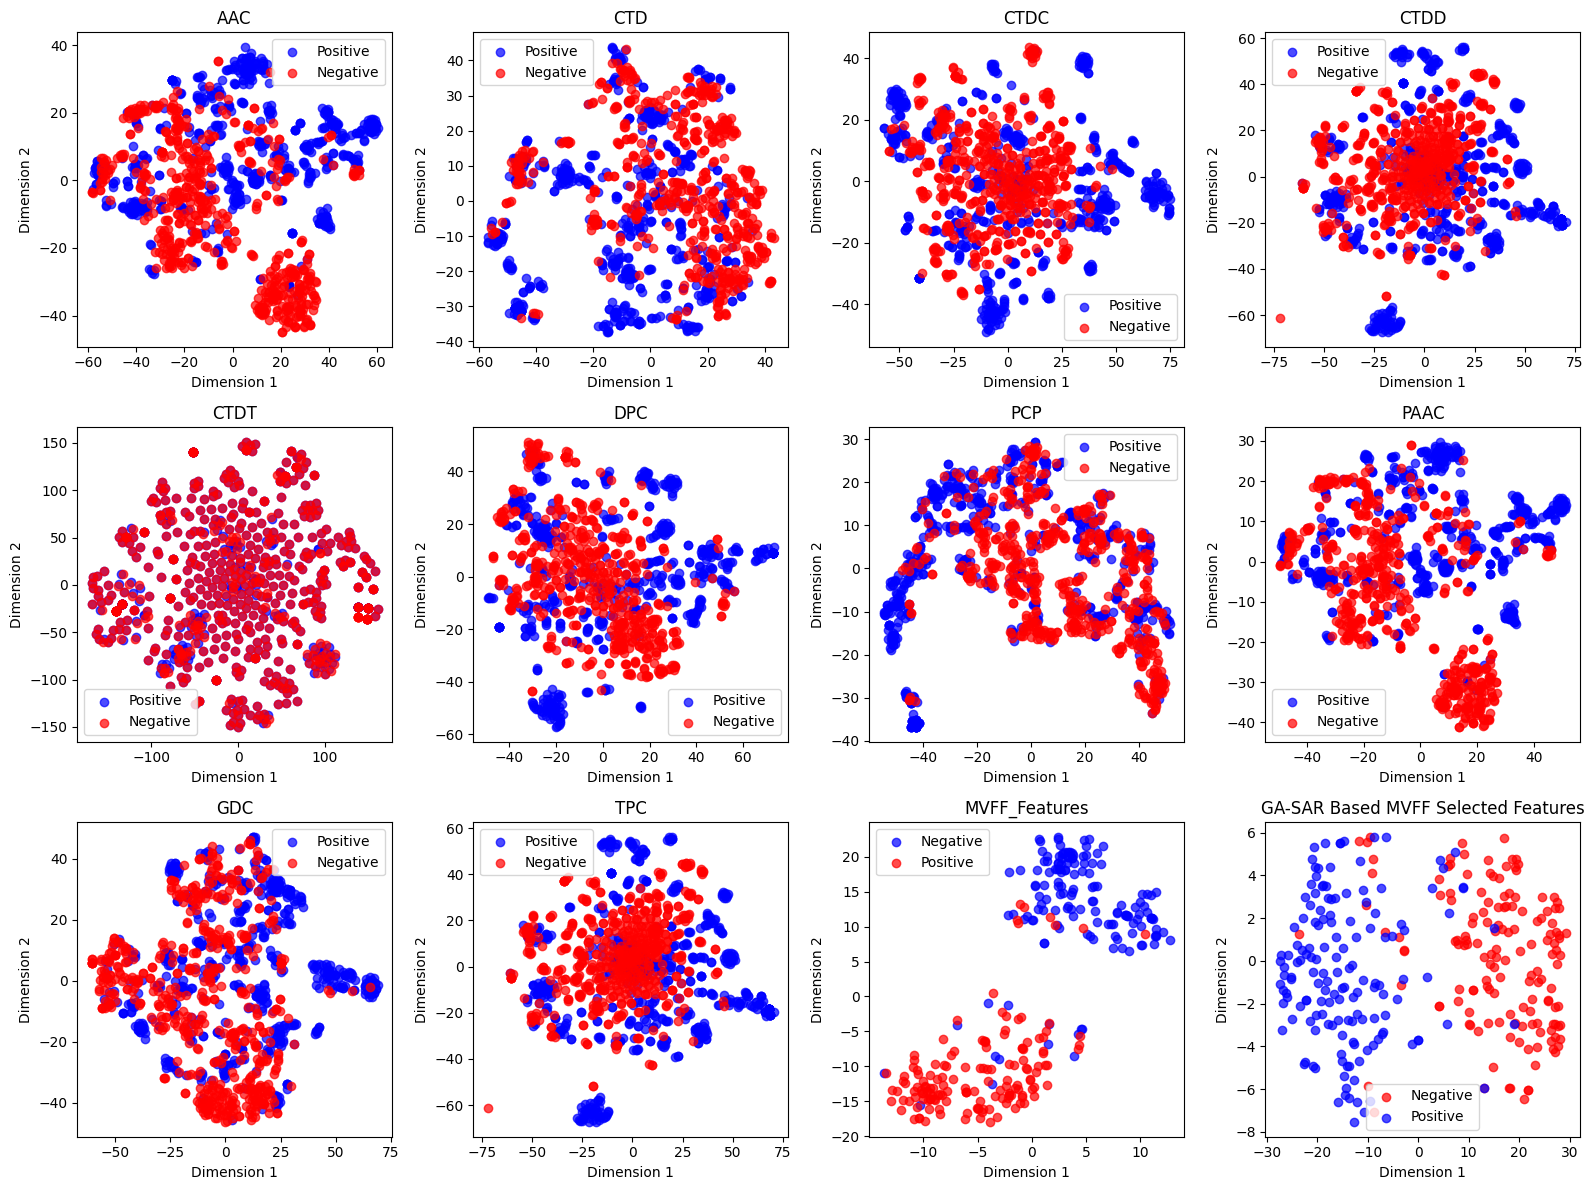

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Define the path for Deep_CLD dataset
deep_cld_path = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Deep_CLD.csv'
Hybride_feature = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/3_Feature vector data marge/N_Three_feature_dataset_ marge_Dataset.csv'

# Load the Deep_CLD dataset
Hyvride_Feature = pd.read_csv(Hybride_feature)

# Assuming the last column contains labels and the rest are features for Deep_CLD
Hybride_feature_labels = Hyvride_Feature.iloc[:, -1]
Hyvride_features = Hyvride_Feature.iloc[:, :-1]

# Load the Deep_CLD dataset
deep_cld_data = pd.read_csv(deep_cld_path)

# Assuming the last column contains labels and the rest are features for Deep_CLD
deep_cld_labels = deep_cld_data.iloc[:, -1]
deep_cld_features = deep_cld_data.iloc[:, :-1]

# Check for NaN values and handle them
if deep_cld_features.isnull().any().any():
    print("Deep_CLD features contain NaN values. Handling NaN values...")
    deep_cld_features = deep_cld_features.fillna(deep_cld_features.mean())  # Fill NaN with mean

if Hyvride_features.isnull().any().any():
    print("Hyvride_Feature features contain NaN values. Handling NaN values...")
    Hyvride_features = Hyvride_features.fillna(Hyvride_features.mean())  # Fill NaN with mean

# Standardize Deep_CLD data
scaler = StandardScaler()
scaled_deep_cld_features = scaler.fit_transform(deep_cld_features)

# Apply t-SNE on Deep_CLD data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_deep_cld_results = tsne.fit_transform(scaled_deep_cld_features)

# Add t-SNE results to DataFrame
deep_cld_data["t-SNE-1"] = tsne_deep_cld_results[:, 0]
deep_cld_data["t-SNE-2"] = tsne_deep_cld_results[:, 1]

# Apply t-SNE on Hyvride_Feature data
tsne_hyvride_results = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(Hyvride_features)
Hyvride_Feature["t-SNE-1"] = tsne_hyvride_results[:, 0]
Hyvride_Feature["t-SNE-2"] = tsne_hyvride_results[:, 1]

# Feature extractor datasets
feature_extractors = [
    {"name": "AAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv"},
    {"name": "CTD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv"},
    {"name": "CTDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_positive_features.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_negative_features.csv"},
    {"name": "CTDD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_positive_features (3).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_negative_features.csv"},
    {"name": "CTDT", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_positive_features (1).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_negative_features.csv"},
    {"name": "DPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv"},
    {"name": "PCP", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/positive_main_pcp.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/negative_main_pcp.csv"},
    {"name": "PAAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_negative.csv"},
    {"name": "GDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_negative.csv"},
    {"name": "TPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/positive_main_tpc.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/negative_main_tpc (1).csv"}
]

# Create a figure with subplots (4 rows, 3 columns)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Iterate through each feature extractor and plot in subplots
for idx, extractor in enumerate(feature_extractors):
    main_positive = pd.read_csv(extractor["positive"])
    main_negative = pd.read_csv(extractor["negative"])

    # Add labels
    main_positive["label"] = "Positive"
    main_negative["label"] = "Negative"

    # Combine positive and negative data
    main_data = pd.concat([main_positive, main_negative])

    # Extract features and labels
    features = main_data.drop(columns=["label"], errors="ignore")
    labels = main_data["label"]

    # Check for NaN values and handle them
    if features.isnull().any().any():
        print(f"{extractor['name']} features contain NaN values. Handling NaN values...")
        features = features.fillna(features.mean())  # Fill NaN with mean

    # Apply t-SNE
    tsne_results = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000).fit_transform(features)
    main_data["t-SNE-1"], main_data["t-SNE-2"] = tsne_results[:, 0], tsne_results[:, 1]

    # Plot t-SNE results in the corresponding subplot
    ax = axes[idx]  # Start from the first subplot
    for label, color in zip(["Positive", "Negative"], ['blue', 'red']):
        subset = main_data[main_data["label"] == label]
        ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7, c=color)
    ax.set_title(f"{extractor['name']}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

# Plot t-SNE for Hyvride_Feature in the 11th subplot
ax = axes[10]  # 11th subplot (index 10)
for label, color, label_name in zip(Hybride_feature_labels.unique(), ['blue', 'red'], ['Negative', 'Positive']):
    subset = Hyvride_Feature[Hybride_feature_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("MVFF_Features")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# Plot t-SNE for Deep_CLD in the 12th subplot
ax = axes[11]  # 12th subplot (index 11)
for label, color, label_name in zip(deep_cld_labels.unique(), ['red', 'blue'], ['Negative', 'Positive']):
    subset = deep_cld_data[deep_cld_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("GA-SAR Based MVFF Selected Features")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# Remove any empty subplots (if any)
for idx in range(12, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and display the figure
plt.tight_layout()

plt.show()


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

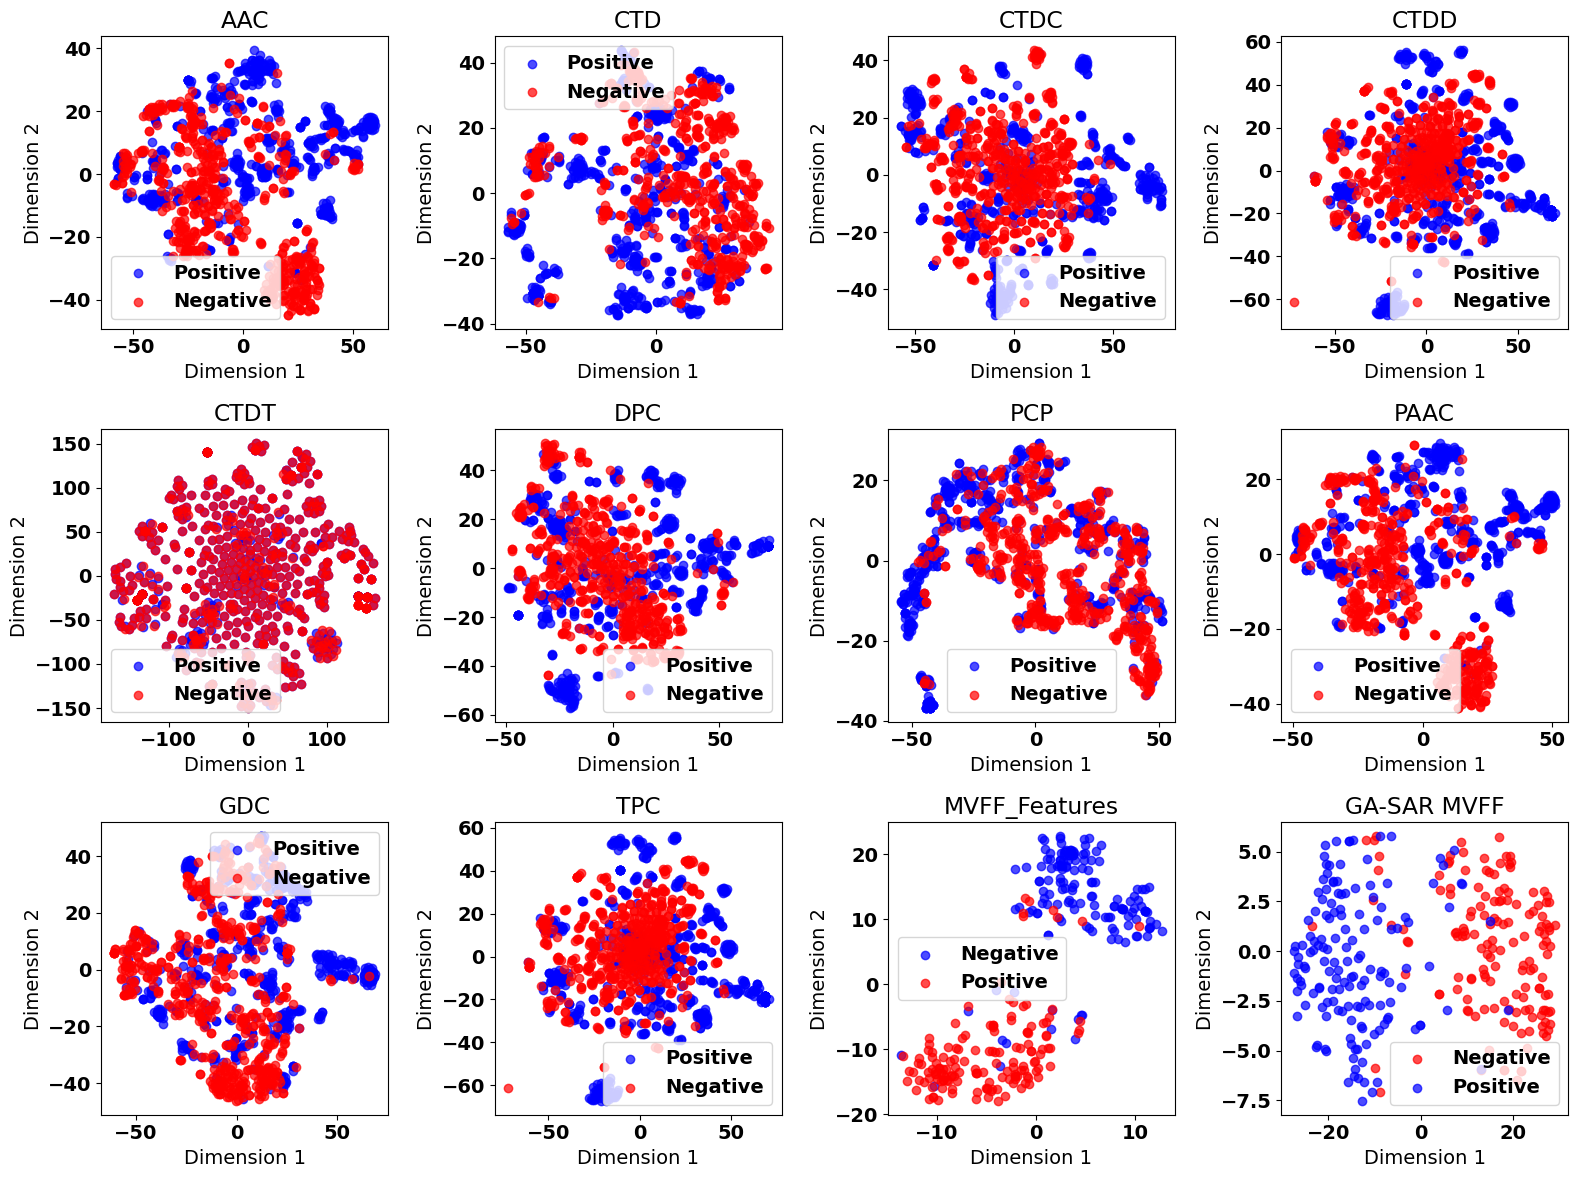

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Define the path for Deep_CLD dataset
deep_cld_path = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Deep_CLD.csv'
Hybride_feature = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/3_Feature vector data marge/N_Three_feature_dataset_ marge_Dataset.csv'

# Load the Deep_CLD dataset
Hyvride_Feature = pd.read_csv(Hybride_feature)

# Assuming the last column contains labels and the rest are features for Deep_CLD
Hybride_feature_labels = Hyvride_Feature.iloc[:, -1]
Hyvride_features = Hyvride_Feature.iloc[:, :-1]

# Load the Deep_CLD dataset
deep_cld_data = pd.read_csv(deep_cld_path)

# Assuming the last column contains labels and the rest are features for Deep_CLD
deep_cld_labels = deep_cld_data.iloc[:, -1]
deep_cld_features = deep_cld_data.iloc[:, :-1]

# Check for NaN values and handle them
if deep_cld_features.isnull().any().any():
    print("Deep_CLD features contain NaN values. Handling NaN values...")
    deep_cld_features = deep_cld_features.fillna(deep_cld_features.mean())  # Fill NaN with mean

if Hyvride_features.isnull().any().any():
    print("Hyvride_Feature features contain NaN values. Handling NaN values...")
    Hyvride_features = Hyvride_features.fillna(Hyvride_features.mean())  # Fill NaN with mean

# Standardize Deep_CLD data
scaler = StandardScaler()
scaled_deep_cld_features = scaler.fit_transform(deep_cld_features)

# Apply t-SNE on Deep_CLD data
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_deep_cld_results = tsne.fit_transform(scaled_deep_cld_features)

# Add t-SNE results to DataFrame
deep_cld_data["t-SNE-1"] = tsne_deep_cld_results[:, 0]
deep_cld_data["t-SNE-2"] = tsne_deep_cld_results[:, 1]

# Apply t-SNE on Hyvride_Feature data
tsne_hyvride_results = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(Hyvride_features)
Hyvride_Feature["t-SNE-1"] = tsne_hyvride_results[:, 0]
Hyvride_Feature["t-SNE-2"] = tsne_hyvride_results[:, 1]

# Feature extractor datasets
feature_extractors = [
    {"name": "AAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv"},
    {"name": "CTD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv"},
    {"name": "CTDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_positive_features.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_negative_features.csv"},
    {"name": "CTDD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_positive_features (3).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_negative_features.csv"},
    {"name": "CTDT", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_positive_features (1).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_negative_features.csv"},
    {"name": "DPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv"},
    {"name": "PCP", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/positive_main_pcp.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/negative_main_pcp.csv"},
    {"name": "PAAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_negative.csv"},
    {"name": "GDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_negative.csv"},
    {"name": "TPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/positive_main_tpc.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/negative_main_tpc (1).csv"}
]

# Create a figure with subplots (4 rows, 3 columns)
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easy iteration

# Iterate through each feature extractor and plot in subplots
for idx, extractor in enumerate(feature_extractors):
    main_positive = pd.read_csv(extractor["positive"])
    main_negative = pd.read_csv(extractor["negative"])

    # Add labels
    main_positive["label"] = "Positive"
    main_negative["label"] = "Negative"

    # Combine positive and negative data
    main_data = pd.concat([main_positive, main_negative])

    # Extract features and labels
    features = main_data.drop(columns=["label"], errors="ignore")
    labels = main_data["label"]

    # Check for NaN values and handle them
    if features.isnull().any().any():
        print(f"{extractor['name']} features contain NaN values. Handling NaN values...")
        features = features.fillna(features.mean())  # Fill NaN with mean

    # Apply t-SNE
    tsne_results = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000).fit_transform(features)
    main_data["t-SNE-1"], main_data["t-SNE-2"] = tsne_results[:, 0], tsne_results[:, 1]

    # Plot t-SNE results in the corresponding subplot
    ax = axes[idx]  # Start from the first subplot
    for label, color in zip(["Positive", "Negative"], ['blue', 'red']):
        subset = main_data[main_data["label"] == label]
        ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7, c=color)
    ax.set_title(f"{extractor['name']}")
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

# Plot t-SNE for Hyvride_Feature in the 11th subplot
ax = axes[10]  # 11th subplot (index 10)
for label, color, label_name in zip(Hybride_feature_labels.unique(), ['blue', 'red'], ['Negative', 'Positive']):
    subset = Hyvride_Feature[Hybride_feature_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("MVFF_Features")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# Plot t-SNE for Deep_CLD in the 12th subplot
ax = axes[11]  # 12th subplot (index 11)
for label, color, label_name in zip(deep_cld_labels.unique(), ['red', 'blue'], ['Negative', 'Positive']):
    subset = deep_cld_data[deep_cld_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("GA-SAR MVFF")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# Remove any empty subplots (if any)
for idx in range(12, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout and display the figure
plt.tight_layout()


plt.savefig("T-SNE_plot.png", dpi=1200)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarnin

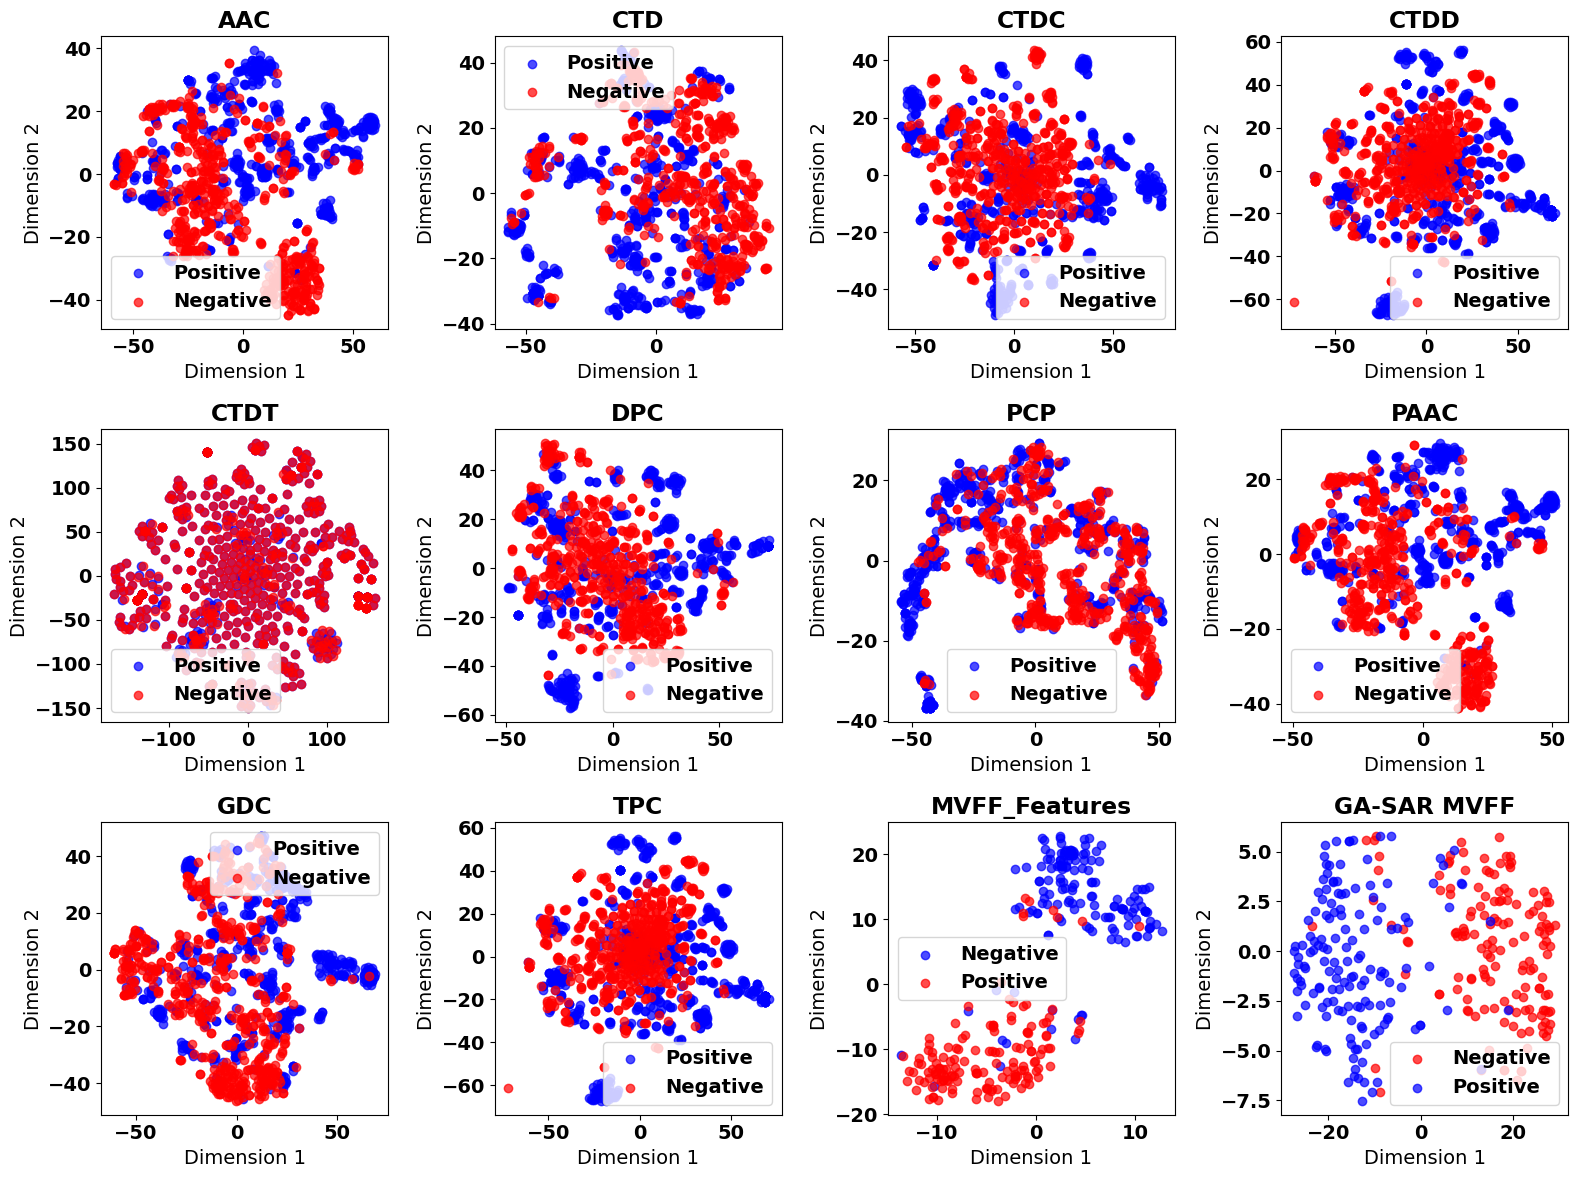

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# -----------------------------
# Dataset Paths
# -----------------------------
deep_cld_path = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/Deep_CLD.csv'
Hybride_feature = '/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/3_Feature vector data marge/N_Three_feature_dataset_ marge_Dataset.csv'

# -----------------------------
# Load Hybride Feature dataset
# -----------------------------
Hyvride_Feature = pd.read_csv(Hybride_feature)
Hybride_feature_labels = Hyvride_Feature.iloc[:, -1]
Hyvride_features = Hyvride_Feature.iloc[:, :-1]

# -----------------------------
# Load Deep_CLD dataset
# -----------------------------
deep_cld_data = pd.read_csv(deep_cld_path)
deep_cld_labels = deep_cld_data.iloc[:, -1]
deep_cld_features = deep_cld_data.iloc[:, :-1]

# -----------------------------
# Handle NaN values
# -----------------------------
if deep_cld_features.isnull().any().any():
    print("Deep_CLD features contain NaN values. Handling NaN values...")
    deep_cld_features = deep_cld_features.fillna(deep_cld_features.mean())

if Hyvride_features.isnull().any().any():
    print("Hyvride_Feature features contain NaN values. Handling NaN values...")
    Hyvride_features = Hyvride_features.fillna(Hyvride_features.mean())

# -----------------------------
# Standardize Deep_CLD data
# -----------------------------
scaler = StandardScaler()
scaled_deep_cld_features = scaler.fit_transform(deep_cld_features)

# -----------------------------
# t-SNE for Deep_CLD
# -----------------------------
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_deep_cld_results = tsne.fit_transform(scaled_deep_cld_features)
deep_cld_data["t-SNE-1"] = tsne_deep_cld_results[:, 0]
deep_cld_data["t-SNE-2"] = tsne_deep_cld_results[:, 1]

# -----------------------------
# t-SNE for Hyvride Feature
# -----------------------------
tsne_hyvride_results = TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(Hyvride_features)
Hyvride_Feature["t-SNE-1"] = tsne_hyvride_results[:, 0]
Hyvride_Feature["t-SNE-2"] = tsne_hyvride_results[:, 1]

# -----------------------------
# Feature extractor datasets
# -----------------------------
feature_extractors = [
    {"name": "AAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/1_AAC/aac_main_negative (2).csv"},
    {"name": "CTD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv"},
    {"name": "CTDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_positive_features.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/3_CTDC/Copy of ctdc_main_negative_features.csv"},
    {"name": "CTDD", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_positive_features (3).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/4_CTDD/ctdd_main_negative_features.csv"},
    {"name": "CTDT", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_positive_features (1).csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/5_CTDT/ctdt_main_negative_features.csv"},
    {"name": "DPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_2/6_DPC (Dipeptide Composition)/DPC_main_negative (1).csv"},
    {"name": "PCP", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/positive_main_pcp.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/9_PCP (Physicochemical Properties)/negative_main_pcp.csv"},
    {"name": "PAAC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/8_PAAC (Pseudo Amino Acid Composition)/paac_main_negative.csv"},
    {"name": "GDC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_positive.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/7_GDC (Grouped Dipeptide Composition)/GDC_main_negative.csv"},
    {"name": "TPC", "positive": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/positive_main_tpc.csv", "negative": "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_3/10_TPC (Tripeptide Composition)/negative_main_tpc (1).csv"}
]

# -----------------------------
# Create figure and subplots
# -----------------------------
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()  # Flatten axes array

# -----------------------------
# Iterate and plot each feature extractor
# -----------------------------
for idx, extractor in enumerate(feature_extractors):
    main_positive = pd.read_csv(extractor["positive"])
    main_negative = pd.read_csv(extractor["negative"])

    main_positive["label"] = "Positive"
    main_negative["label"] = "Negative"

    main_data = pd.concat([main_positive, main_negative])

    features = main_data.drop(columns=["label"], errors="ignore")
    labels = main_data["label"]

    if features.isnull().any().any():
        print(f"{extractor['name']} features contain NaN values. Handling NaN values...")
        features = features.fillna(features.mean())

    tsne_results = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000).fit_transform(features)
    main_data["t-SNE-1"], main_data["t-SNE-2"] = tsne_results[:, 0], tsne_results[:, 1]

    ax = axes[idx]
    for label, color in zip(["Positive", "Negative"], ['blue', 'red']):
        subset = main_data[main_data["label"] == label]
        ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7, c=color)
    ax.set_title(f"{extractor['name']}", fontweight="bold", fontname="Times New Roman")  # Bold + Times New Roman
    ax.set_xlabel("Dimension 1")
    ax.set_ylabel("Dimension 2")
    ax.legend()

# -----------------------------
# t-SNE for Hyvride Feature
# -----------------------------
ax = axes[10]
for label, color, label_name in zip(Hybride_feature_labels.unique(), ['blue', 'red'], ['Negative', 'Positive']):
    subset = Hyvride_Feature[Hybride_feature_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("MVFF_Features", fontweight="bold", fontname="Times New Roman")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# -----------------------------
# t-SNE for Deep_CLD
# -----------------------------
ax = axes[11]
for label, color, label_name in zip(deep_cld_labels.unique(), ['red', 'blue'], ['Negative', 'Positive']):
    subset = deep_cld_data[deep_cld_labels == label]
    ax.scatter(subset["t-SNE-1"], subset["t-SNE-2"], c=color, label=label_name, alpha=0.7)
ax.set_title("GA-SAR MVFF", fontweight="bold", fontname="Times New Roman")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.legend()

# Remove empty subplots
for idx in range(12, len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.savefig("T-SNE_plot.png", dpi=1200)
plt.show()
